<a href="https://colab.research.google.com/github/Khansachca/Khansachca/blob/main/AIJ0202S2302_C01_Non_Hierarchical_Clustering_Percobaan_Chaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Non-Hierarchical Clustering

# Import Library

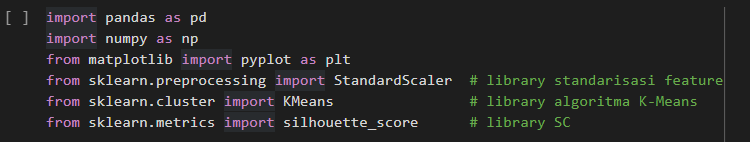

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

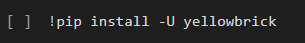

In [66]:
!pip install -U yellowbrick


Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

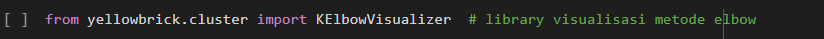

In [3]:
from yellowbrick.cluster import KElbowVisualizer

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

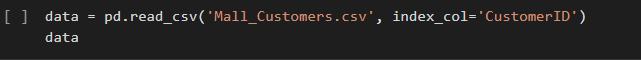

In [9]:
import pandas as pd
data = pd.read_csv('/content/Mall_Customers.csv', index_col='CustomerID')


Memeriksa kelengkapan dataset.

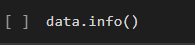

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

In [11]:
X = data[['AnnualIncome', 'SpendingScore']].values

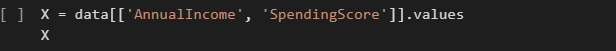

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

![image.png](data:image/png;base64,

*   Item daftar

*   Item daftar

*   Item daftar
*   Item daftar


*   Item daftar


*   Item daftar

iVBORw0KGgoAAAANSUhEUgAAAjAAAAA8CAYAAAB4rIA9AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAukSURBVHhe7d1HiBTBHsfx8smK4KqIEUXFeBDBCIp4WFExgBnUgwfTQQ96EDyYE+LBRcSTggnxIGJWzAdRD4IZBC8GVBTzguGgK/jer17/1952Uu/Orpbz/cAwu90z3dXVNVX/rqqZbtKtW7efDgAAICD/iZ4BAACCQQADAACCQwADAACCQwADAACCQwADAACCQwADAACCQwADAACCQwADAACC07R169br9UfPnj3d4sWL3ejRo11FRYVr3ry5e/TokX9RocaPH+/mzJnj3z9ixAj38uVLV1VVFa0FwrJo0SK3cOFCd+bMmWiJc0OHDnWVlZXu2bNn7tWrV9FSlJru3bu77du3u6ZNm7qHDx9GS/Oj/ADFU6sH5vv37+7AgQNu/fr17vz589HSwuk9eq+2oW0V09q1a92JEyfc5MmToyXODRo0yB0+fNjt2LEjWtI4unXr5vbt2+fOnj1b81D6/jSlQelS+hqK5fmCBQuiJc6fE50by4vkeSoGHZttX/tXOhqSgpcpU6a4ixcvRkv+79atW+7x48du2bJlvhGrj2S+JcuQ8ljL43ldyqzsWX419ufe6Lxv2bLFffv2zR07dswvs3OZPIdKY7y8FrP8AKUumCGkjRs3uufPn7tp06bVNNDz5s1zX79+9Vc0jUUVkfb3+fNnN3HixJqH0henCk0VV7Eb8r+NGlc19qdPn67Ji6lTp7pTp05FrygO5a+2ffTo0WhJw9FVsvZ18uTJmgYqbvfu3f55xYoV/rkuVI7UW3nnzp2afEuWoXzUONa3ES/GNhqDPvNLly51r1+/rskv/f8nqFdOFMQYlXd9BgYPHlzzmddnQ+k+ePCgu3v3rl8mxSg/AAKbA3P58mXXpk0bN3bsWF9JqHK4fv26D2waS9euXf2z0gLnunTp4t68eeMuXboULQmfel6+fPnizp07Fy2pTd3/R44ccZ07d3bTp0+PlqZj5ejevXv+OZM9e/b4hlrPpa5t27auRYsW7v79+9GSP0PB7YABA9zVq1d9OYjTZ0BD5mPGjPF108iRI33dlAzmi1F+AAQWwKgi0BXrqFGj3MyZM33l8Ccq92bNmvlKKhPrSlavRHl5uX/ONESgCi4+DJUcdtFrdWUcHzpJXikntzF8+PBozS82DJFtG7aP+H7i6ZT4NjZv3uyPK65jx44+qMzF8sW2kxwGSq6vy1BYchvJ49D/Ot748STzQ936vXr1ythAxd2+fdsHOfFjKJbkcSi9cUqzlvfu3ds/7HVphtYK2YbSod4DPWt5pn3kOm9WPpcsWVKrnCaPJ7mNNMdh8pXzXOfe0qmyrXRo/8uXL/evSZZDBTDZglvVR8ePH3edOnVyK1eu9AGX3p9JQ5YfoFQE9y2k/fv3u+rqat+Ipu0FUWVhFXHykaxUs7GuYqv0kxWl1msIZefOnb6C0nOmIYJZs2b5ys7WJYfHRPto166dX6/taJ2lU39v2LCh1lDWjRs3/Dqj4+3Ro0fN+uQ2jAIfvU7Bll7Tv39/36iIXjtp0qSa41i1apU/LqNj0mTvGTNmZM1HbWv+/Pm1hpkUgFq3utI0bNgwPyRg+1DlP3fuXL++EMl9aBs6jmQQozwdN26cX6+HGpt4mocMGeLL1tu3b6MlmSm40VyG9u3bR0sKo/Qon5IBbrzRtjKUzGtj+aR81yNTnuZT6DYsjRcuXPDrNYSjoVsp9LxNmDDB95TqNSqjyn87Vj1rKC1b2dC5Uf5Y4GzlTIFGtjKq9LZs2fK3z2a+c9+nTx+3d+9e/3e/fv188KbjGThwoF8m+vvTp09Zg1uduwcPHvi80XO281HX8gPgl+ACGFUgGkaqC1Umqhytoow/0vTkWNe+5mNYIJOp4c5l69atvrIz6hpXZamucqOhGZvfo6EGdU9ryEaUD2VlZVmv8ETHu3r16ui/37dhtJ9169b5IOrFixd+mVWs6i5Xr1c8rUnxxlANTPIKWr1VuXrLtE4Nip5F6VZDqeCtUMqP+D60DTUgCszUmBgFBJq7oPUfPnzwc6ji+dGhQwf/bGnJp1WrVqkmY9pcHjW28QA3TfDR2FTOLV/fv3/vgwPlaaHnTUGLvd+GzGwIzaicZWKfNe1H+aW06P/4PCu9V2mw//W3AiYFKPFymO/cq7xY+df79e2i+JcRdJ51vt+9exct+Z3yRWWuUGnLD4Bfggtg1BiqEVZFmeyxyEeVWX17YOKsck1eVRYi2W2uhj8NBRgayspHV6G2DzWWGu5JUi9OvBFSY6pjU96qsSqUAhld/aphiF+laxtq+HKxngl7KDBMQ42mBZP2yDSkprSp8RIds9KZdvJsKVEDHm+wlVfKMysv9T1vKm8KKhRs2DaSvWa5ZCtfluZ4oNQY515DqbrA0nHFJ/QCKL6gAhgFGaogdXWkik4VRZphBmucFXQkH3aFWBfZriqzsW7z+DdQGuLbNWoI1DDo6lX7UHCh3paGpIbh6dOnta7SFSDl6k3ReVVlb70Reqg3Jw01YPGhEHvEG9tC2NBRoYFxruGEf10xzpvEP5falrZZ6AVFtvJlPYjWo1IMOs8639mGffS51oWM0rRr1y5/oZXvIquUyw9QX8EEMFY5qIJUsKHuYgUAf8NVjnqFdHUX/0aJVZzx8XOjQEe9J/qhP7FjS0PHLjp+UbCS7HFQpR6/6lSwl6kHJhsLRmwYRunUVz81FyEbvUZzT/Q+Cxw0PKbAM1ujpG58XelbnlmgmobyXmkstOHLptDJlTbZN9twgvV8pelNSEtBW3KYJK36bKMY5y1J20r7G1IqXzr3Vg/oWPR5yjUHpa5UzvTtIU3mTVKwLBrWVdnXHLdsF1n5yg+A/IIJYOKVg9GE3kKucopJlbR1ddtDvQ02h8So4tTERwUV9jprzCz4sgmJeu/NmzdTVdy2fduGgozkNyOUV5pXo6tavUYBTdorZOWxaBuaSHnt2rVavTjxISo99Bo1HPGueQWc6mGytOqhoTxrNLUPBVp6r9bp66fxhkfnVseiddqGAij7xog1WspTTcDUZE7bhx5pAwibXKnGJdfcBJvsW+wGUpRmpT05cTV5LMl8i+dpoeqzjXznrRDJoVRtS+UnTY+oXqvPk02Itm00xNCgfohOkgGMBW/6TFoe5LrIasjyA5SKJv9rHH7qD91KQL9JoB/uevLkiV9ZV8XcFtDY1DgpWNCV/Zo1a6Klvyiw0bwNBTqZ1uPftmnTJj9xWAGSBTRpUH6A4ghuEi/Q0NQo6UpegUymHxqzX2K1X1RFadF51zCjlYO0KD9AcdTqgZk9e3bNN1v0zZq090PSzRxtHoaGQw4dOkQPDIKlIQnNYdKzUVCj+9hs27atTlffjUHDernmomgYUd8YQ92pF0X3fdPv12S63UQ2IZQfIBQ1AQwAAEAoGEICAADBIYABAADBIYABAADBIYABAADBIYABAADBIYABAADBIYABAADBCSaA0U+7x+99I7pni+7doh/uAgAApSOYAEb3HdHNEuM3btQNHnUzucrKSv8/AAAoDU1bt269Pvr7r1dWVuZGjBjhfvz44bp27eoqKirc5cuX3ZUrV6JXAACAUhDcrQQ0lNS3b1//98ePH7mnCwAAJSi4Sbz79+931dXVrry83Pe+AACA0hNcAKO7A7dp0yb6DwAAlKLgApgxY8a4qqoq9/r161oTegEAQOkIKoBZsGCB6927t7t+/bo7e/as74mZO3dutBYAAJSKYAIY/ebLuHHj3KNHj9yePXvcqVOn3J07d9zgwYNr/TYMAAD49wUTwOg3X2Tfvn3+WTShV8NJDCUBAFBagvsaNQAAQHCTeAEAAAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcAhgAABAcJoMHz78Z/Q3AABAEOiBAQAAgXHuv1LjLyEIQ9dUAAAAAElFTkSuQmCC)

In [23]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/Mall_Customers.csv', index_col='CustomerID')
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



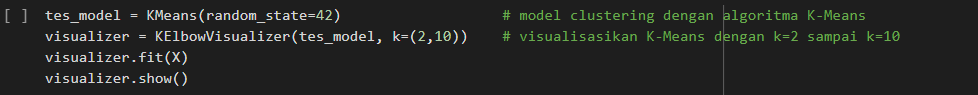

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

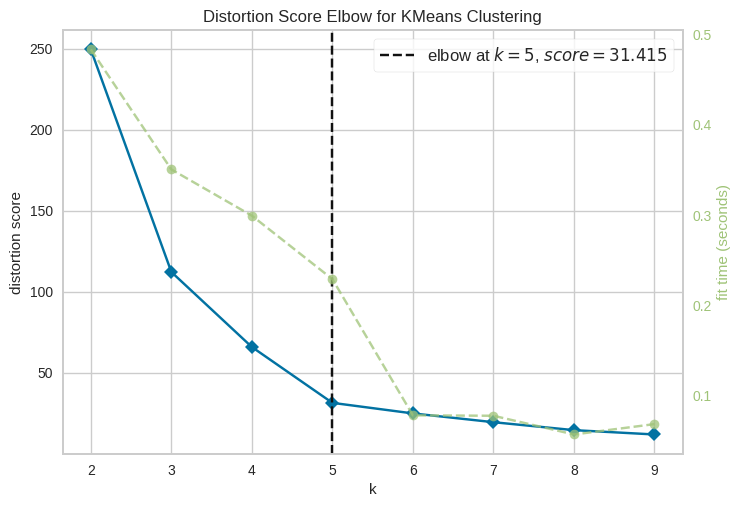

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()


Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

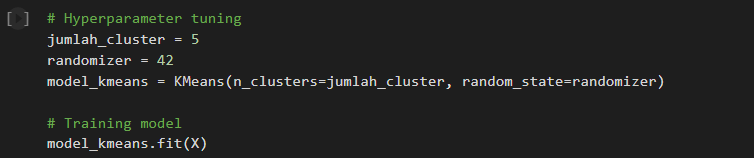

In [32]:
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)
model_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

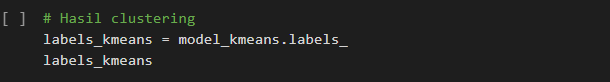

In [31]:
labels_kmeans = model_kmeans.labels_


Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

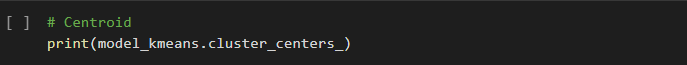

In [30]:
print(model_kmeans.cluster_centers_)


[[-0.09894748 -1.20506271]
 [-0.11772005  0.91897759]
 [ 7.52694521 -0.11868539]
 [ 0.37342132  4.15876808]
 [-0.17079383 -0.15322869]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

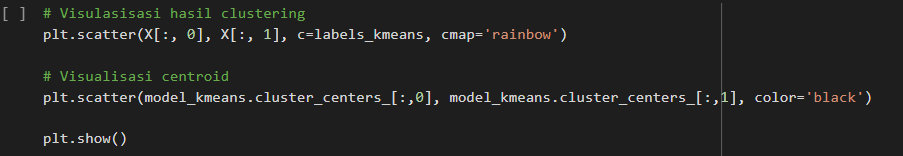

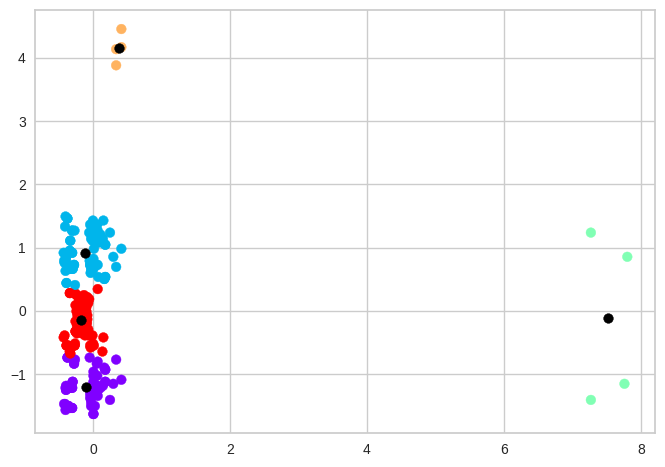

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

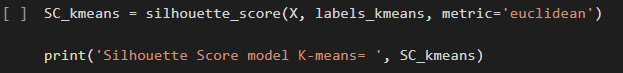

In [72]:
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.4978301226707703


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

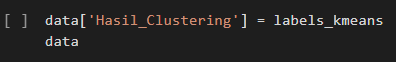

In [64]:
# Tulis di sini
data['Hasil_Clustering'] = labels_kmeans

**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

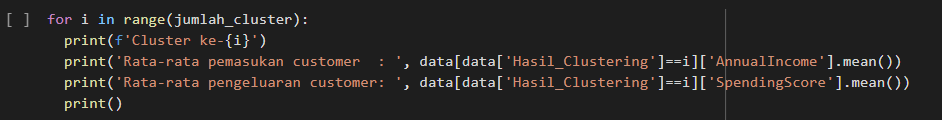

In [69]:
# Tulis di sini
for i in range(jumlah_cluster):
  print(f'Cluser ke-{i}')
  print('Rata-rata umur customer : ', data[data['Hasil_Clustering']==i]['Age'].mean())
  print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluser ke-0
Rata-rata umur customer :  29.337349397590362
Rata-rata pemasukan customer :  61.04819277108434
Rata-rata pengeluaran customer :  84.24096385542168

Cluser ke-1
Rata-rata umur customer :  43.601351351351354
Rata-rata pemasukan customer :  56.3445945945946
Rata-rata pengeluaran customer :  34.36486486486486

Cluser ke-2
Rata-rata umur customer :  38.25
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer :  48.5

Cluser ke-3
Rata-rata umur customer :  339.4
Rata-rata pemasukan customer :  102.6
Rata-rata pengeluaran customer :  52.4



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


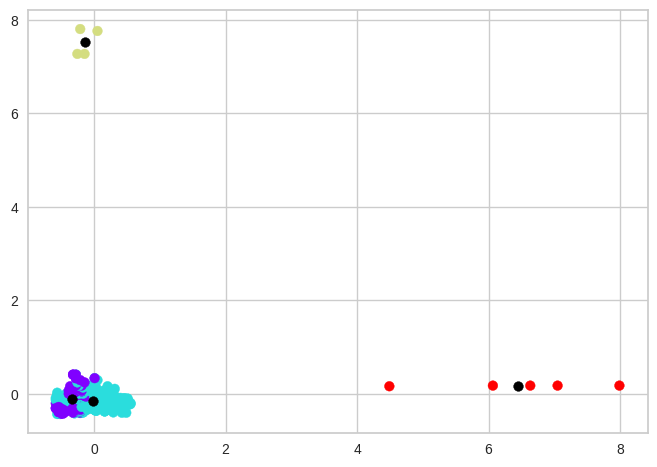


Silhouette Score model K-means= 0.4978301226707703

Cluser ke-0
Rata-rata umur customer :  29.337349397590362
Rata-rata pemasukan customer :  61.04819277108434
Rata-rata pengeluaran customer :  84.24096385542168

Cluser ke-1
Rata-rata umur customer :  43.601351351351354
Rata-rata pemasukan customer :  56.3445945945946
Rata-rata pengeluaran customer :  34.36486486486486

Cluser ke-2
Rata-rata umur customer :  38.25
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer :  48.5

Cluser ke-3
Rata-rata umur customer :  339.4
Rata-rata pemasukan customer :  102.6
Rata-rata pengeluaran customer :  52.4



In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data = pd.read_csv('/content/Mall_Customers.csv', index_col='CustomerID')
X = data[['Age','AnnualIncome', 'SpendingScore']].values
X = StandardScaler().fit_transform(X)
jumlah_cluster = 4
randomizer = 46
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)
model_kmeans.fit(X)

labels_kmeans = model_kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

print()

SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means=', SC_kmeans)

print()

data['Hasil_Clustering'] = labels_kmeans

for i in range(jumlah_cluster):
  print(f'Cluser ke-{i}')
  print('Rata-rata umur customer : ', data[data['Hasil_Clustering']==i]['Age'].mean())
  print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC